In [ ]:
#Importing neccessary libraries
import os
import torch
import torchvision
import tarfile
from torch import nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
import opendatasets as od
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm

%matplotlib inline
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
os.listdir("flowers")
for cls in os.listdir("flowers"):
    print(cls, ':', len(os.listdir("flowers" + '/' + cls)))
dataset_path=Path("flowers")

cpu
daisy : 764
dandelion : 1052
rose : 784
sunflower : 733
tulip : 984


In [ ]:
image_paths = []
labels = []
class_names = os.listdir(dataset_path)  # Get class (folder) names
class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}  # Assign index to each class

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):  # Ensure it's a directory
        for img_file in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_file))
            labels.append(class_to_idx[class_name])  # Assign label

# Splitting dataset using sklearn train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels)  # 80-20 split

Random image path: flowers\dandelion\151385302_f8980a257f_n.jpg
Image class: dandelion
Image height: 240
Image width: 320


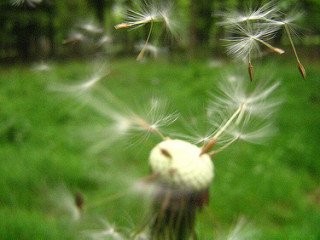

In [ ]:
import random
from PIL import Image

random.seed(42)
random_image_path = Path(random.choice(image_paths))
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [ ]:
# The transformations to be applied
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(0.5,0.5) #Normalize
])

In [ ]:
#Creating a custom dataset
class FlowerDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open image
        image = Image.open(img_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label

#Creating train and test datasets
train_data = FlowerDataset(train_paths, train_labels, transform=transform)
test_data = FlowerDataset(test_paths, test_labels, transform=transform)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Test data:


In [ ]:
#Getting to know the data
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[-0.3490, -0.2863, -0.5922,  ..., -0.1294, -0.0431,  0.0431],
         [-0.3255, -0.2392, -0.5137,  ..., -0.1137, -0.0118,  0.0431],
         [-0.2863, -0.2157, -0.4431,  ...,  0.0745,  0.0196, -0.0353],
         ...,
         [-0.9373, -0.8039, -0.6235,  ..., -0.8588, -0.8510, -0.8980],
         [-0.9373, -0.7333, -0.6078,  ..., -0.8824, -0.8980, -0.8510],
         [-0.9529, -0.7725, -0.6000,  ..., -0.9451, -0.9373, -0.9216]],

        [[ 0.0039, -0.0039, -0.4980,  ..., -0.0588,  0.0118,  0.0902],
         [ 0.0118,  0.0588, -0.3804,  ..., -0.0588,  0.0353,  0.0980],
         [ 0.0431,  0.1137, -0.2627,  ...,  0.1294,  0.0667,  0.0196],
         ...,
         [-0.9137, -0.8353, -0.6235,  ..., -0.7176, -0.7255, -0.7882],
         [-0.8902, -0.7412, -0.6235,  ..., -0.6706, -0.7804, -0.7255],
         [-0.9059, -0.7725, -0.6392,  ..., -0.8667, -0.8588, -0.7882]],

        [[-0.4902, -0.4667, -0.7882,  ..., -0.2941, -0.2235, -0.1843],
         [-0.4980, -0.4745, -0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].


tensor([[[-0.3490, -0.2863, -0.5922,  ..., -0.1294, -0.0431,  0.0431],
         [-0.3255, -0.2392, -0.5137,  ..., -0.1137, -0.0118,  0.0431],
         [-0.2863, -0.2157, -0.4431,  ...,  0.0745,  0.0196, -0.0353],
         ...,
         [-0.9373, -0.8039, -0.6235,  ..., -0.8588, -0.8510, -0.8980],
         [-0.9373, -0.7333, -0.6078,  ..., -0.8824, -0.8980, -0.8510],
         [-0.9529, -0.7725, -0.6000,  ..., -0.9451, -0.9373, -0.9216]],

        [[ 0.0039, -0.0039, -0.4980,  ..., -0.0588,  0.0118,  0.0902],
         [ 0.0118,  0.0588, -0.3804,  ..., -0.0588,  0.0353,  0.0980],
         [ 0.0431,  0.1137, -0.2627,  ...,  0.1294,  0.0667,  0.0196],
         ...,
         [-0.9137, -0.8353, -0.6235,  ..., -0.7176, -0.7255, -0.7882],
         [-0.8902, -0.7412, -0.6235,  ..., -0.6706, -0.7804, -0.7255],
         [-0.9059, -0.7725, -0.6392,  ..., -0.8667, -0.8588, -0.7882]],

        [[-0.4902, -0.4667, -0.7882,  ..., -0.2941, -0.2235, -0.1843],
         [-0.4980, -0.4745, -0.7176,  ..., -0

Text(0.5, 1.0, 'sunflower')

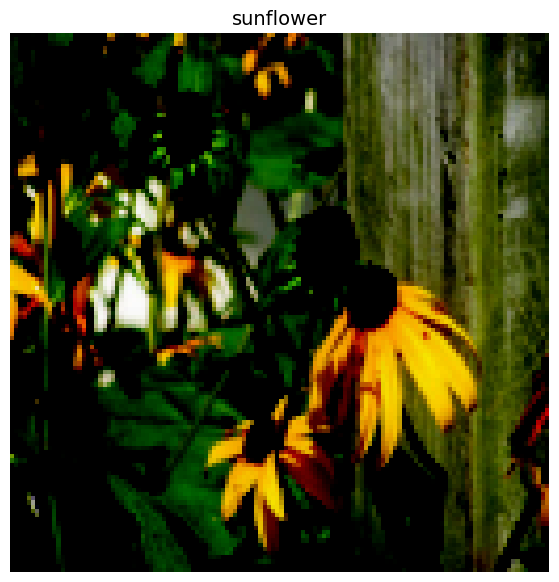

In [ ]:
#Rearranging the order of dimensions
print(img)
img_permute = img.permute(1, 2, 0)

#Printing out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

#Plotting the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [ ]:
batch_size=32
#Creating train and test dataloaders
train_dataloader = DataLoader(train_data, batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x2ec5c7dfb20>,
 <torch.utils.data.dataloader.DataLoader at 0x2ec5c7dfca0>)

In [ ]:
#Creating a Convolutional Neural Network 
class FlowerClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(32 * 32 * 64, 1024),
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU(),
            nn.Linear(128, 5)
        )
    
    def forward(self, x):
        return self.model(x)

torch.manual_seed(42)
model_2 = FlowerClassifierCNN()

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
#Function to evaluate our model
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
#Function to train our model
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc
    
#Function to test our model
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        return test_loss, test_acc

In [32]:
torch.manual_seed(42)
trainloss=[]
testloss=[]
trainacc=[]
testacc=[]
# Train and test model 
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    a,b=train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    c,d=test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )
    trainloss+=[a]
    trainacc+=[b]
    testloss+=[c]
    testacc+=[d]


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.41568 | Train accuracy: 36.25%


 10%|█         | 1/10 [01:45<15:53, 105.93s/it]

Test loss: 1.26300 | Test accuracy: 45.02%

Epoch: 1
---------
Train loss: 1.19064 | Train accuracy: 49.60%


 20%|██        | 2/10 [04:10<17:07, 128.45s/it]

Test loss: 1.14919 | Test accuracy: 51.27%

Epoch: 2
---------
Train loss: 1.10983 | Train accuracy: 53.51%


 30%|███       | 3/10 [06:05<14:16, 122.41s/it]

Test loss: 1.08160 | Test accuracy: 60.19%

Epoch: 3
---------
Train loss: 1.01934 | Train accuracy: 59.00%


 40%|████      | 4/10 [08:05<12:08, 121.43s/it]

Test loss: 0.97513 | Test accuracy: 61.11%

Epoch: 4
---------
Train loss: 0.93774 | Train accuracy: 62.15%


 50%|█████     | 5/10 [10:07<10:08, 121.70s/it]

Test loss: 0.89378 | Test accuracy: 63.66%

Epoch: 5
---------
Train loss: 0.86239 | Train accuracy: 65.25%


 60%|██████    | 6/10 [12:49<09:01, 135.43s/it]

Test loss: 0.99805 | Test accuracy: 60.30%

Epoch: 6
---------
Train loss: 0.79365 | Train accuracy: 68.86%


 70%|███████   | 7/10 [16:31<08:11, 163.70s/it]

Test loss: 0.96055 | Test accuracy: 62.73%

Epoch: 7
---------
Train loss: 0.71617 | Train accuracy: 72.09%


 80%|████████  | 8/10 [20:00<05:56, 178.00s/it]

Test loss: 0.86501 | Test accuracy: 67.82%

Epoch: 8
---------
Train loss: 0.58552 | Train accuracy: 77.44%


 90%|█████████ | 9/10 [23:31<03:08, 188.50s/it]

Test loss: 1.02832 | Test accuracy: 65.28%

Epoch: 9
---------
Train loss: 0.53965 | Train accuracy: 80.40%


100%|██████████| 10/10 [27:04<00:00, 162.49s/it]

Test loss: 0.92384 | Test accuracy: 68.98%



In [33]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FlowerClassifierCNN',
 'model_loss': 0.9191188216209412,
 'model_acc': 68.75}

In [ ]:
#Getting a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

#Getting a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

#Performing a forward pass on a single image
model_2.eval()
with torch.inference_mode():
    pred = model_2(img_single.to(device))
    
#Printing out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[-1.5314, -3.4991,  0.0599,  3.1864,  3.9231]])

Output prediction probabilities:
tensor([[2.8428e-03, 3.9735e-04, 1.3958e-02, 3.1816e-01, 6.6465e-01]])

Output prediction label:
tensor([4])

Actual label:
4


In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_2.eval()
with torch.inference_mode():
    pred = model_2(img_single.to(device))
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[-0.2096,  1.6688, -2.2986,  1.9204, -0.0833]])

Output prediction probabilities:
tensor([[0.0581, 0.3800, 0.0072, 0.4888, 0.0659]])

Output prediction label:
tensor([3])

Actual label:
1


In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_2.eval()
with torch.inference_mode():
    pred = model_2(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[-0.0795, -3.6184,  0.2895, -2.5967,  7.0147]])

Output prediction probabilities:
tensor([[8.2816e-04, 2.4054e-05, 1.1977e-03, 6.6818e-05, 9.9788e-01]])

Output prediction label:
tensor([4])

Actual label:
4


In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_2.eval()
with torch.inference_mode():
    pred = model_2(img_single.to(device))
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[ 0.3772,  3.8901,  0.2513, -3.8279, -0.3055]])

Output prediction probabilities:
tensor([[2.7819e-02, 9.3318e-01, 2.4526e-02, 4.1505e-04, 1.4055e-02]])

Output prediction label:
tensor([1])

Actual label:
1


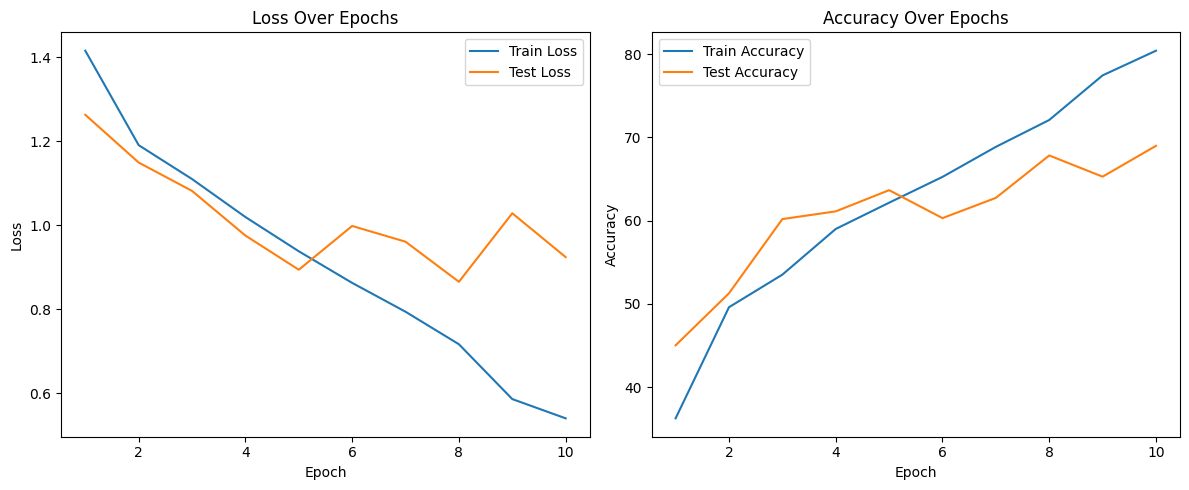

In [ ]:
# Converting tensors to lists if they are still tensors
train_loss = [t.item() if isinstance(t, torch.Tensor) else t for t in trainloss]
test_loss = [t.item() if isinstance(t, torch.Tensor) else t for t in testloss]
train_accuracy = [t.item() if isinstance(t, torch.Tensor) else t for t in trainacc]
test_accuracy = [t.item() if isinstance(t, torch.Tensor) else t for t in testacc]

epochs_range= range(1, epochs+1)
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Train Accuracy')
plt.plot(epochs_range, test_accuracy, label='Test Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

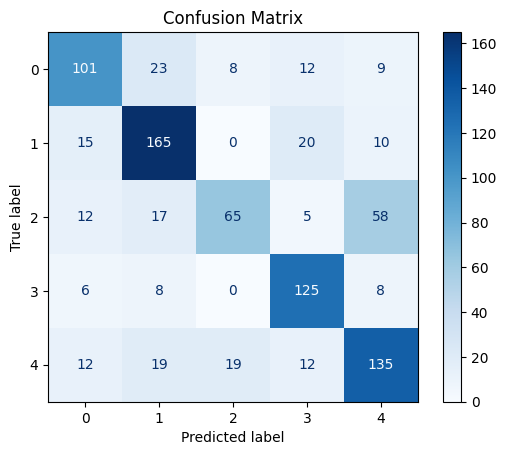

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Ensure model is in evaluation mode
model_2.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model_2(images.to(device))
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
